# 线性回归

## Basic Concepts

- 训练集 (Training Set)：用于训练模型的数据集合，用x代表输入，y代表输出。
- 损失函数 (Loss Function)：损失函数指的是单个样本的误差度量，$L_{(w, b)} = (wx_i + b - y_i)^2 = (\hat{y_i} - y_i)^2$
- 成本函数 (Cost Function)：成本函数是所有样本的误差度量，是损失函数的求和除以特定系数，$J_{(w, b)} = \frac{1}{2n} \sum_{i=1}^{n}{(wx_i+b - y_i)^2} = \frac{1}{2n} \sum_{i=1}^{n}{(\hat{y_i} - y_i)^2}$
- forward：函数forward通常被用于实现向前传播(Forward Propagation)。在前向传播中，输入数据逐层通过模型计算，产生最终的输出或预测值。例如在线性模型中，forward函数计算从输入$x$到输出$\hat{y_i}$的整个过程，直观地表达了数据从输入流向输出的过程。

## Instance

- 简化模型$\hat{y}=wx + b$为$\hat{y}=wx$。
- 计算在不同自变量w下的loss，然后再得到cost，cost通常是MSE(Mean Square Error)。

| Hours, x | Points, y | Loss (w = 1)          | Loss (w = 2)      | Loss (w = 3)          | Loss (w = 4)            |
|----------|-----------|-----------------------|-------------------|-----------------------|-------------------------|
| 1        | 2         | 1                     | 0                 | 1                     | 4                       |  
| 2        | 4         | 4                     | 0                 | 4                     | 16                      |
| 3        | 6         | 9                     | 0                 | 9                     | 36                      |
|          |           | $MSE=\frac{1+4+9}{3}$ | $MSE=\frac{0}{3}$ | $MSE=\frac{1+4+9}{3}$ | $MSE=\frac{4+16+36}{3}$ |

w=0.0, MSE=9.333333333333334
w=0.1, MSE=8.423333333333334
w=0.2, MSE=7.560000000000001
w=0.30000000000000004, MSE=6.743333333333332
w=0.4, MSE=5.973333333333334
w=0.5, MSE=5.25
w=0.6000000000000001, MSE=4.5733333333333315
w=0.7000000000000001, MSE=3.943333333333333
w=0.8, MSE=3.3599999999999994
w=0.9, MSE=2.823333333333333
w=1.0, MSE=2.3333333333333335
w=1.1, MSE=1.8899999999999995
w=1.2000000000000002, MSE=1.4933333333333325
w=1.3, MSE=1.1433333333333329
w=1.4000000000000001, MSE=0.8399999999999997
w=1.5, MSE=0.5833333333333334
w=1.6, MSE=0.373333333333333
w=1.7000000000000002, MSE=0.20999999999999974
w=1.8, MSE=0.09333333333333325
w=1.9000000000000001, MSE=0.023333333333333293
w=2.0, MSE=0.0
w=2.1, MSE=0.023333333333333418
w=2.2, MSE=0.09333333333333349
w=2.3000000000000003, MSE=0.21000000000000027
w=2.4000000000000004, MSE=0.37333333333333396
w=2.5, MSE=0.5833333333333334
w=2.6, MSE=0.8400000000000004
w=2.7, MSE=1.1433333333333346
w=2.8000000000000003, MSE=1.493333333333334
w=2.9000

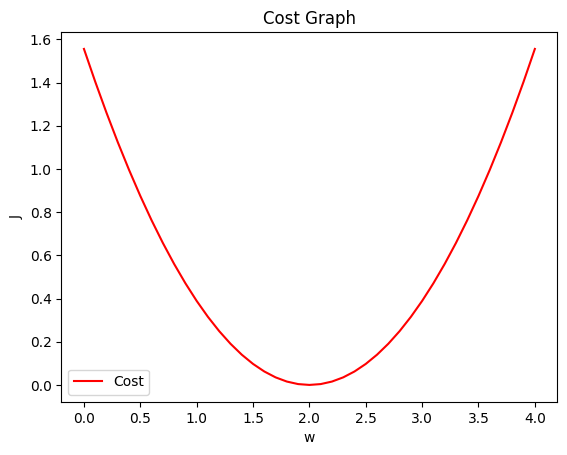

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# our model for the forward pass
# \hat{y} = wx
def forward(x):
    return x * w


# loss function
def loss(x, y):
    # \hat{y}, the predicted y
    y_pred = forward(x)
    return (y_pred - y) ** 2


# initial data for the linear regression model 
x_data = np.array([1, 2, 3])
y_data = np.array([2, 4, 6])

# record the history of W and J to plot the loss function diagram
w_history = []
j_history = []

# see COST under different W
for w in np.arange(0, 4.1, 0.1):
    cost = 0
    
    for x, y in zip(x_data, y_data):
        cost += loss(x, y)
    
    cost = cost / (2 * len(x_data))
    
    print(f"w={w}, MSE={cost}")
    
    w_history.append(w)
    j_history.append(cost / (2 * len(x_data)))
    
# plot the loss diagram
plt.figure()
plt.plot(w_history, j_history, label='Cost', color='red')
plt.title('Cost Graph')
plt.xlabel('w')
plt.ylabel('J')
plt.xticks(np.arange(0, 4.1, 0.5))
plt.legend()
plt.show()

## 梯度下降 (Gradient Descent)

梯度下降是一种用于寻找函数最小值的算法。**为了找到使成本函数最小化的参数，梯度下降算法沿着成本函数的梯度负方向不断更新参数，直到损失函数收敛到一个最小值。**值得注意的是，梯度下降算法只能得到**局部最小值**，**这和设置的成本函数的起始参数有关**。

- **梯度下降算法：$w_i = w_i - \alpha \cdot \frac{\partial{J(w_1, w_2, ..., w_n)}}{\partial{w_i}}$**

对于[Instance](#instance)中例子而言，成本函数J关于w的偏导为 $\frac{1}{n}{\sum_{i=1}^{n}{x_i(wx_i - y_i)}$ ，对于每一组训练样本 $(x_i, y_i)$ ，偏导就是 $x_i(wx_i - y_i)$ 。

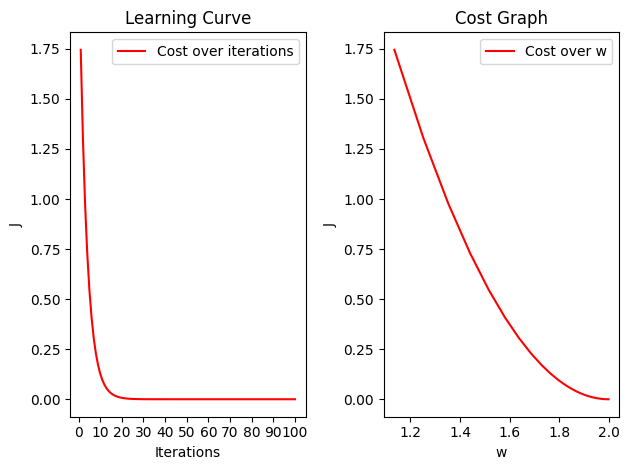

In [10]:
def forward(x):
    return x * w


def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2


# compute the gradient
def gradient(x, y):
    return x * (w * x - y)


# initialize a random number for W
w = 1
# set learning rate as 0.01
a = 0.01

# initial data for the linear regression model 
x_data = np.array([1, 2, 3])
y_data = np.array([2, 4, 6])

w_history = []
j_history = []
iterations = []

# iterate the process of gradient descent to optimize W
for iteration in range(100):
    # iterate over the whole data set to modify W
    for x, y in zip(x_data, y_data):
        gra = gradient(x, y)
        w = w - a * gra
    
    cost = 0
    
    # get the cost under a certain W 
    for x, y in zip(x_data, y_data):
        cost += loss(x, y)
    
    cost = cost / (2 * len(x_data))
    
    w_history.append(w)
    j_history.append(cost)
    iterations.append(iteration + 1)
    
plt.figure()

# plot the learning curve
plt.subplot(1, 2, 1)
plt.title('Learning Curve')
plt.plot(iterations, j_history, label='Cost over iterations', color='red')
plt.xlabel('Iterations')
plt.ylabel('J')
plt.xticks(np.arange(0, len(iterations) + 1, 10))
plt.legend()
    
# plot the cost function
plt.subplot(1, 2, 2)
plt.title('Cost Graph')
plt.plot(w_history, j_history, label='Cost over w', color='red')
plt.xlabel('w')
plt.ylabel('J')
plt.legend()

plt.tight_layout()
plt.show()